In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

- Explored correlation between weather conditions and severity of accident, contributing collision factors, and total number of accidents, respectively

In [2]:
allzipcodes_weather_df = pd.read_csv("../Resources/allzipcodes_collision_weather_df.csv")


/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_7989/1254585080.py:1: DtypeWarning: Columns (14,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  allzipcodes_weather_df = pd.read_csv("../Resources/allzipcodes_collision_weather_df.csv")


In [3]:
allzipcodes_weather_df.columns

Index(['collision_id', 'crash_datetime', 'crash_day_of_week',
       'crash_hour_category', 'street_address', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'zip_code', 'latitude', 'longitude',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'Density', 'Population',
       'contributing_factor', 'number_of_injuries', 'number_of_deaths',
       'severity_of_accident', 'date', 'hour', 'tempmax', 'tempmin', 'temp',
       'humidity', 'precip', 'preciptype', 'snow', 'windspeed', 'visibility',
       'severerisk', 'sunrise', 'sunset', 'icon', 'temperature_category',
       'precip_category', 'humid_category', 'wind_level', 'vis_level',
       'Density_rank', 'zip_code_count', 'total_inflicted'],
      dtype='object')

In [4]:
allzipcodes_weather_df.set_index('collision_id',inplace = True)

In [5]:
# select the top 10 zipcodes that have the largest number of accidents  
top10_zipcode = allzipcodes_weather_df['zip_code'].value_counts().sort_values(ascending = False).head(10)
top10_zipcode

zip_code
11236    2817
11207    2093
11222    1911
10472    1722
11203    1539
10468    1522
11385    1457
10314    1428
11355    1404
11435    1376
Name: count, dtype: int64

This map shows the top 10 areas with the most traffic accident counts in 2022.

Explore the heatmap correlation between weather conditions and contributing factors among the top 10 accident-prone areas in 2022

In [6]:
weather_conditions = ['rain', 'cloudy', 'clear-day', 'snow']
precip_conditions= ['Dry', 'Light', 'Moderate', 'Heavy']
temp_conditions = ['Freezing Cold', 'Cold', 'Moderate', 'Warm', 'Hot']
humid_conditions = ['Low', 'High', 'Very High']
wind_conditions = ['Flags ripple', 'Flags wave', 'Leaves scatter', 'Small trees sway', 'Umbrellas not working']

In [7]:
top_contributing_factors = allzipcodes_weather_df['contributing_factor'][~allzipcodes_weather_df['contributing_factor'].isin(["Unspecified", "Other Vehicular"])].value_counts(normalize=True).head(10).index
top_contributing_factors = top_contributing_factors.to_list()
top_contributing_factors

['Driver Inattention/Distraction',
 'Failure to Yield Right-of-Way',
 'Following Too Closely',
 'Passing or Lane Usage Improper',
 'Passing Too Closely',
 'Unsafe Speed',
 'Backing Unsafely',
 'Traffic Control Disregarded',
 'Turning Improperly',
 'Unsafe Lane Changing']

These collection of graphs presents a comprehensive view of weather conditions associated with accident data in top 10 areas with the largest number of traffic accidents in 2022. 

The precipitation graph indicates that dry conditions are most common during accidents, with a notable decrease in accident counts as precipitation increases. Temperature-related accidents are fairly distributed across 'Freezing Cold', 'Cold', and 'Moderate' categories, with fewer occurring in 'Warm' and 'Hot' conditions. High humidity seems to be the most prevalent condition in accidents, suggesting a possible impact on road safety. Wind levels mostly result in accidents when flags wave or leaves scatter, which are moderate wind conditions. Snow-related accidents are overwhelmingly more frequent when there is no snow, and visibility is predominantly high during most accidents, indicating that poor visibility is less commonly a contributing factor. The data suggests that most accidents occur under moderate weather conditions, with extreme weather being less commonly associated with traffic accidents.

In [8]:
## select the most accidents-prone zip codes
zipcode_weather_df = allzipcodes_weather_df[allzipcodes_weather_df["zip_code"].isin(top10_zipcode.index)]
zipcode_weather_df[["zip_code","latitude","longitude"]]

,zip_code,latitude,longitude
collision_id,,,
4521660,10314,40.609830,-74.121614
4521937,10472,40.834552,-73.865853
4522285,11207,40.666256,-73.900215
4522136,11203,40.650110,-73.930214
4521469,11236,40.633104,-73.882573
...,...,...,...
4616509,10468,40.862831,-73.911285
4620283,10468,40.862831,-73.911285
4629703,11203,40.663136,-73.938000


In [9]:
# Filter data for rainy, non-rainy, and snowy days
rainy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'rain']
cloudy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'cloudy']
clear_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'clear-day']
snowy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'snow']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_rainy = rainy_days['contributing_factor'][rainy_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_cloudy= cloudy_days['contributing_factor'][cloudy_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_clear= clear_days['contributing_factor'][clear_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True) 
ratio_snowy= snowy_days['contributing_factor'][snowy_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True) 

weather_data = {}
# Create a DataFrame for the heatmap
for factor in top_contributing_factors: 
    weather_data[factor] = [ratio_rainy.get(factor, 0), ratio_cloudy.get(factor, 0), ratio_clear.get(factor, 0), ratio_snowy.get(factor, 0)]

heatmap_data_weather_cf = pd.DataFrame(weather_data, index=['rainy', 'cloudy', 'clear', 'snowy'])

In [10]:
# Filter data for different precipitation levels
dry_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Dry']
light_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Light']
moderate_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Moderate']
heavy_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Heavy']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_dry = dry_days['contributing_factor'][dry_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_light = light_days['contributing_factor'][light_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_moderate = moderate_days['contributing_factor'][moderate_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_heavy = heavy_days['contributing_factor'][heavy_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
precip_data = {}
for factor in top_contributing_factors:
    precip_data[factor] = [ratio_dry.get(factor, 0), ratio_light.get(factor, 0), ratio_moderate.get(factor, 0), ratio_heavy.get(factor, 0)]

heatmap_data_precip_cf = pd.DataFrame(precip_data, index=['Dry', 'Light', 'Moderate', 'Heavy'])

# Filter data for different temperature levels
fc_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Freezing Cold']
cold_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Cold']
mod_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Moderate']
warm_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Warm']
hot_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Hot']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_fc_temp = fc_days['contributing_factor'][fc_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_cold_temp = cold_days['contributing_factor'][cold_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_mod_temp = mod_days['contributing_factor'][mod_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_warm_temp = warm_days['contributing_factor'][warm_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_hot_temp = hot_days['contributing_factor'][hot_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
temp_data = {}
for factor in top_contributing_factors:
    temp_data[factor] = [ratio_fc_temp.get(factor, 0), ratio_cold_temp.get(factor, 0), ratio_mod_temp.get(factor, 0), ratio_warm_temp.get(factor, 0), ratio_hot_temp.get(factor, 0)]

heatmap_data_temp_cf = pd.DataFrame(temp_data, index=['Freezing Cold', 'Cold', 'Moderate', 'Warm', 'Hot'])


# Filter data for different visibility levels
low_vis = zipcode_weather_df[zipcode_weather_df['vis_level'] == 'Poor']
mod_vis = zipcode_weather_df[zipcode_weather_df['vis_level'] == 'Moderate']
good_vis = zipcode_weather_df[zipcode_weather_df['vis_level'] == 'Good']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_low_vis = low_vis['contributing_factor'][low_vis['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_mod_vis = mod_vis['contributing_factor'][mod_vis['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_good_vis = good_vis['contributing_factor'][good_vis['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
vis_data = {}
for factor in top_contributing_factors:
    vis_data[factor] = [ratio_low_vis.get(factor, 0), ratio_mod_vis.get(factor, 0), ratio_good_vis.get(factor, 0)]

heatmap_data_vis_cf = pd.DataFrame(vis_data, index=['Poor', 'Moderate', 'Good'])

# Filter data for different wind levels
flags_ripple = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Flags ripple']
flags_wave = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Flags wave']
leaves_scatter = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Leaves scatter']
small_trees_sway = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Small trees sway']
umbrellas_not_working = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Umbrellas not working']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_flags_ripple = flags_ripple['contributing_factor'][flags_ripple['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_flags_wave = flags_wave['contributing_factor'][flags_wave['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_leaves_scatter = leaves_scatter['contributing_factor'][leaves_scatter['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_small_trees_sway = small_trees_sway['contributing_factor'][small_trees_sway['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_umbrellas_not_working = umbrellas_not_working['contributing_factor'][umbrellas_not_working['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
wind_data = {}
for factor in top_contributing_factors:
    wind_data[factor] = [ratio_flags_ripple.get(factor, 0), ratio_flags_wave.get(factor, 0), ratio_leaves_scatter.get(factor, 0), ratio_small_trees_sway.get(factor, 0), ratio_umbrellas_not_working.get(factor, 0)]

heatmap_data_wind_cf = pd.DataFrame(wind_data, index=['Flags ripple', 'Flags wave', 'Leaves scatter', 'Small trees sway', 'Umbrellas not working'])


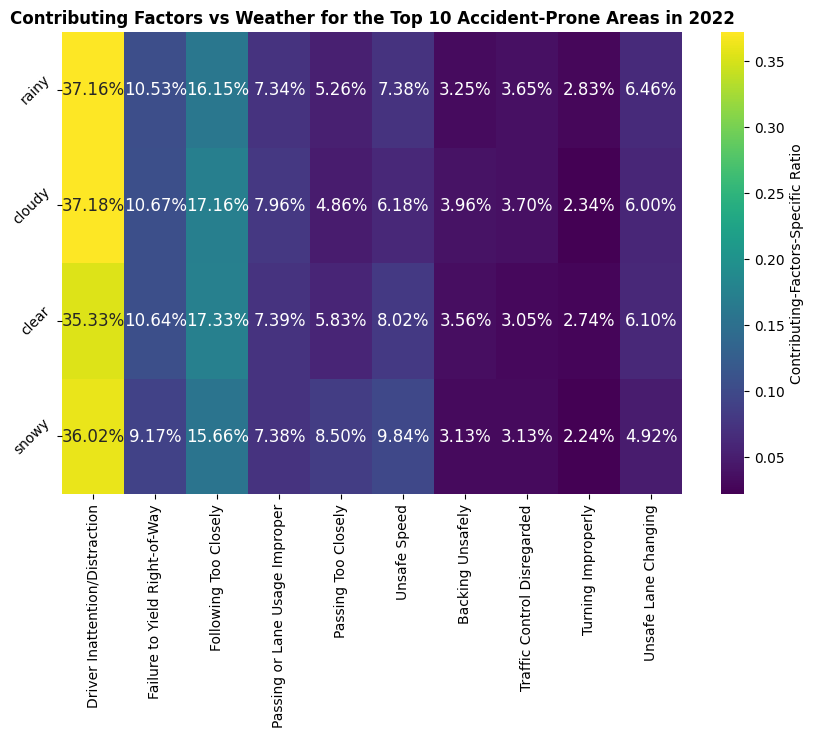

In [11]:
# Set up the first plot that shows the overall impact of weather on contributing factors
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_weather_cf, annot = True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'},
            annot_kws={"size": 12})
plt.title('Contributing Factors vs Weather for the Top 10 Accident-Prone Areas in 2022',fontweight = "bold")
plt.tick_params(axis='y', rotation=45)  

plt.savefig('../static/images/contributingfactors_weather_top10.png', dpi=300, bbox_inches='tight')
plt.show()

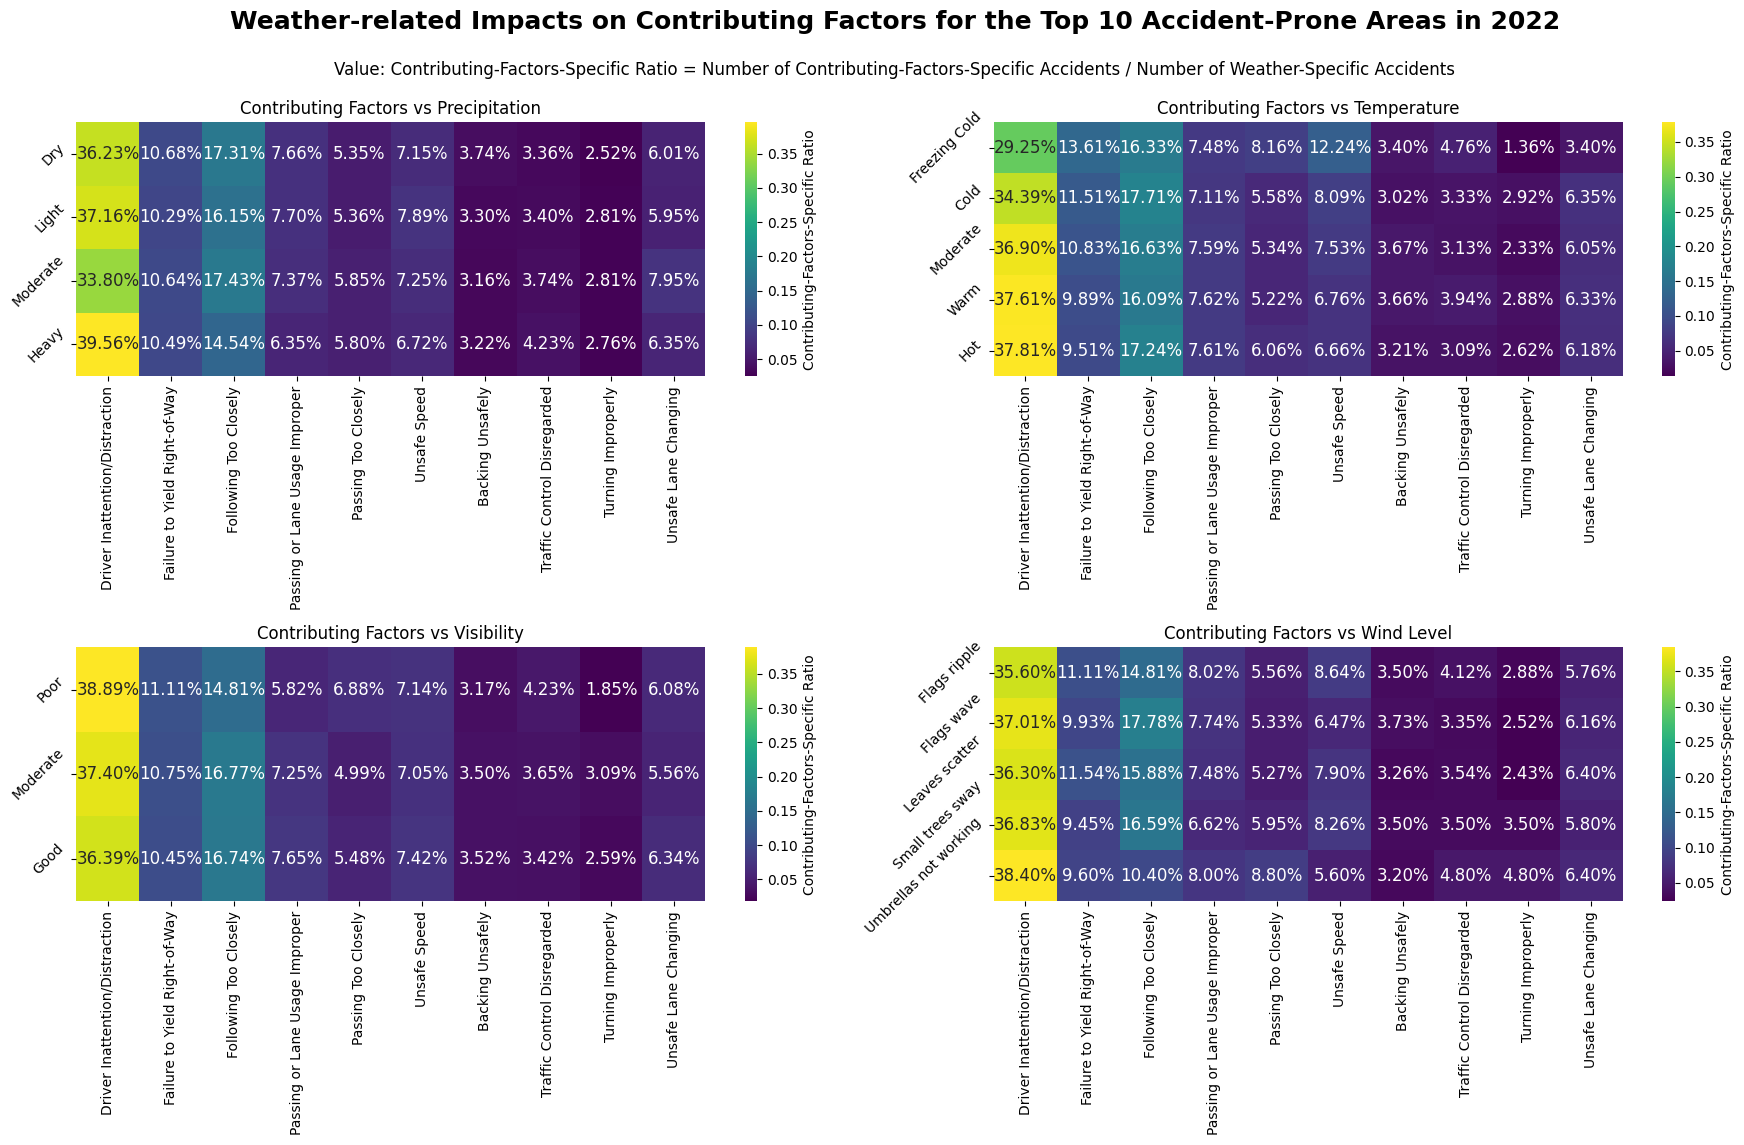

In [12]:
# Set up the plot for other weater details
# Set up the grid layout
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Weather-related Impacts on Contributing Factors for the Top 10 Accident-Prone Areas in 2022', fontsize=18, fontweight = 'bold')
fig.text(0.5, 0.93, 'Value: Contributing-Factors-Specific Ratio = Number of Contributing-Factors-Specific Accidents / Number of Weather-Specific Accidents',
         ha='center', va='center', fontsize=12)

sns.heatmap(heatmap_data_precip_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'},
            annot_kws={"size": 12}, ax = axes[0,0])
axes[0, 0].set_title('Contributing Factors vs Precipitation')
axes[0, 0].tick_params(axis='y', rotation=45) 

sns.heatmap(heatmap_data_temp_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'}, 
            annot_kws={"size": 12},ax = axes[0,1])
axes[0, 1].set_title('Contributing Factors vs Temperature')
axes[0, 1].tick_params(axis='y', rotation=45)  

sns.heatmap(heatmap_data_vis_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'}, 
            annot_kws={"size": 12}, ax = axes[1,0])

axes[1, 0].set_title('Contributing Factors vs Visibility')
axes[1, 0].tick_params(axis='y', rotation=45)  

sns.heatmap(heatmap_data_wind_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'}, 
            annot_kws={"size": 12}, ax = axes[1,1])
axes[1, 1].set_title('Contributing Factors vs Wind Level')
axes[1, 1].tick_params(axis='y', rotation=45)  

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../static/images/contributingfactors_moreweather_top10.png', dpi=300, bbox_inches='tight')
plt.show()


We cannot discern noticeable differences in the relative frequency of a single contributing factor across various weather conditions. Perhaps we can gain more insights by breaking down accidents into nonmotorists and motorists cases, and that is what we will be doing in the following files.

Create heatmap correlation plots between weather info and severity of accidents for the areas with top 10 most traffic accidents in 2022

In [13]:
severity_of_accidents = allzipcodes_weather_df['severity_of_accident'].value_counts().index
severity_of_accidents=severity_of_accidents.to_list()
severity_of_accidents

['Minor',
 'Serious (Low)',
 'Serious (Medium)',
 'Serious (High)',
 'Fatal',
 'Very Fatal']

In [14]:
# Filter data for rainy, non-rainy, and snowy days
rainy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'rain']
cloudy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'cloudy']
clear_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'clear-day']
snowy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'snow']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_rainy = rainy_days['severity_of_accident'].value_counts(normalize=True)
ratio_cloudy = cloudy_days['severity_of_accident'].value_counts(normalize=True)
ratio_clear = clear_days['severity_of_accident'].value_counts(normalize=True)
ratio_snowy = snowy_days['severity_of_accident'].value_counts(normalize=True)

# Create a DataFrame for the heatmap
weather_data = {}
for severity in severity_of_accidents:
    weather_data[severity] = [ratio_rainy.get(severity, 0), ratio_cloudy.get(severity, 0), ratio_clear.get(severity, 0),ratio_snowy.get(severity, 0)]

heatmap_data_weather = pd.DataFrame(weather_data, index=['rainy', 'cloudy', 'clear', 'snowy'])
heatmap_data_weather

,Minor,Serious (Low),Serious (Medium),Serious (High),Fatal,Very Fatal
rainy,0.604023,0.284269,0.104407,0.004740,0.002562,0.000000
cloudy,0.616063,0.272624,0.105430,0.003620,0.002262,0.000000
clear,0.609368,0.273181,0.108179,0.005231,0.003804,0.000238
snowy,0.686977,0.229391,0.080048,0.001195,0.001195,0.001195


In [15]:
# Filter data by precipitation level
dry_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Dry']
light_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Light']
moderate_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Moderate']
heavy_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Heavy']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_dry = dry_days['severity_of_accident'].value_counts(normalize=True)
ratio_light = light_days['severity_of_accident'].value_counts(normalize=True)
ratio_moderate = moderate_days['severity_of_accident'].value_counts(normalize=True)
ratio_heavy = heavy_days['severity_of_accident'].value_counts(normalize=True)

# Create a DataFrame for the heatmap
precip_data = {}
for severity in severity_of_accidents:
    precip_data[severity] = [ratio_dry.get(severity, 0), ratio_light.get(severity, 0), ratio_moderate.get(severity, 0),ratio_heavy.get(severity, 0)]

heatmap_data_precip = pd.DataFrame(precip_data, index=['Dry', 'Light', 'Moderate', 'Heavy'])

# Filter data by temperature level
fc_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Freezing Cold']
cold_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Cold']
mod_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Moderate']
warm_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Warm']
hot_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Hot']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_fc = fc_days['severity_of_accident'].value_counts(normalize=True)
ratio_cold = cold_days['severity_of_accident'].value_counts(normalize=True)
ratio_mod = mod_days['severity_of_accident'].value_counts(normalize=True)
ratio_warm = warm_days['severity_of_accident'].value_counts(normalize=True)
ratio_hot = hot_days['severity_of_accident'].value_counts(normalize=True)

# Create a DataFrame for the heatmap
temp_data = {}
for severity in severity_of_accidents:
    temp_data[severity] = [ratio_fc.get(severity, 0), ratio_cold.get(severity, 0), ratio_mod.get(severity, 0),ratio_warm.get(severity, 0),ratio_hot.get(severity, 0)]

heatmap_data_temp = pd.DataFrame(temp_data, index=['Freezing Cold', 'Cold', 'Moderate', 'Warm', 'Hot'])

# Filter data for different visibility levels
low_vis = zipcode_weather_df[zipcode_weather_df['vis_level'] == 'Poor']
mod_vis = zipcode_weather_df[zipcode_weather_df['vis_level'] == 'Moderate']
good_vis = zipcode_weather_df[zipcode_weather_df['vis_level'] == 'Good']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_low_vis = low_vis['severity_of_accident'].value_counts(normalize=True)
ratio_mod_vis = mod_vis['severity_of_accident'].value_counts(normalize=True)
ratio_good_vis = good_vis['severity_of_accident'].value_counts(normalize=True)

# Create a DataFrame for the heatmap
vis_data = {}
for severity in severity_of_accidents:
    vis_data[severity] = [ratio_low_vis.get(severity, 0), ratio_mod_vis.get(severity, 0), ratio_good_vis.get(severity, 0)]

heatmap_data_vis = pd.DataFrame(vis_data, index=['Poor', 'Moderate', 'Good'])

# Filter data by wind level
flags_ripple = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Flags ripple']
flags_wave = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Flags wave']
leaves_scatter = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Leaves scatter']
small_trees_sway = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Small trees sway']
umbrellas_not_working = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Umbrellas not working']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_fr = flags_ripple['severity_of_accident'].value_counts(normalize=True)
ratio_fw = flags_wave['severity_of_accident'].value_counts(normalize=True)
ratio_ls = leaves_scatter['severity_of_accident'].value_counts(normalize=True)
ratio_sts = small_trees_sway['severity_of_accident'].value_counts(normalize=True)
ratio_unw = umbrellas_not_working['severity_of_accident'].value_counts(normalize=True)

# Create a DataFrame for the heatmap
wind_data = {}
for severity in severity_of_accidents:
    wind_data[severity] = [ratio_fr.get(severity, 0), ratio_fw.get(severity, 0), ratio_ls.get(severity, 0),ratio_sts.get(severity, 0),ratio_unw.get(severity, 0)]

heatmap_data_wind = pd.DataFrame(wind_data, index=['Flags ripple', 'Flags wave', 'Leaves scatter', 'Small trees sway', 'Umbrellas not working'])


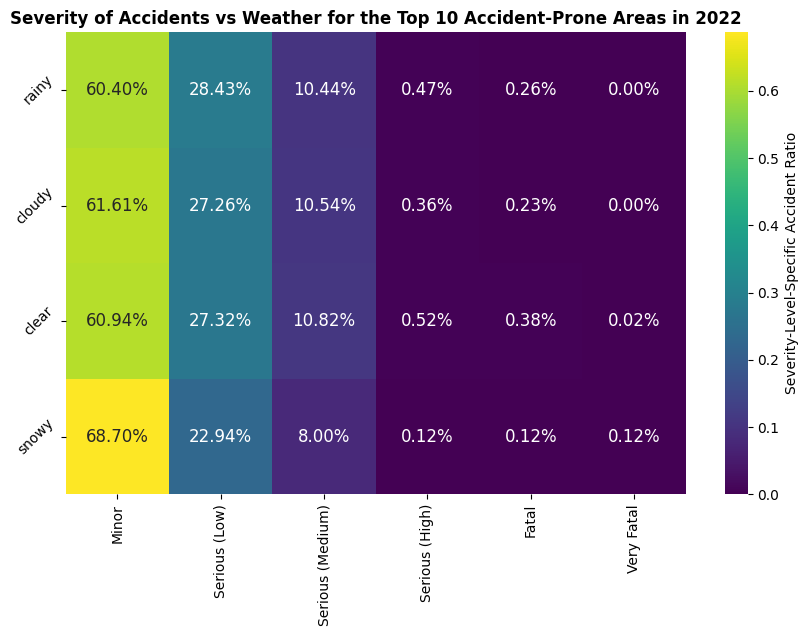

In [16]:
# Set up the first plot that shows the overall impact of weather on severity of accidents
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_weather, annot = True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity-Level-Specific Accident Ratio'},
            annot_kws={"size": 12})
plt.title('Severity of Accidents vs Weather for the Top 10 Accident-Prone Areas in 2022',fontweight = "bold")
plt.tick_params(axis='y', rotation=45) 
plt.savefig('../static/images/severity_weather_top10.png', dpi=300, bbox_inches='tight')
plt.show()

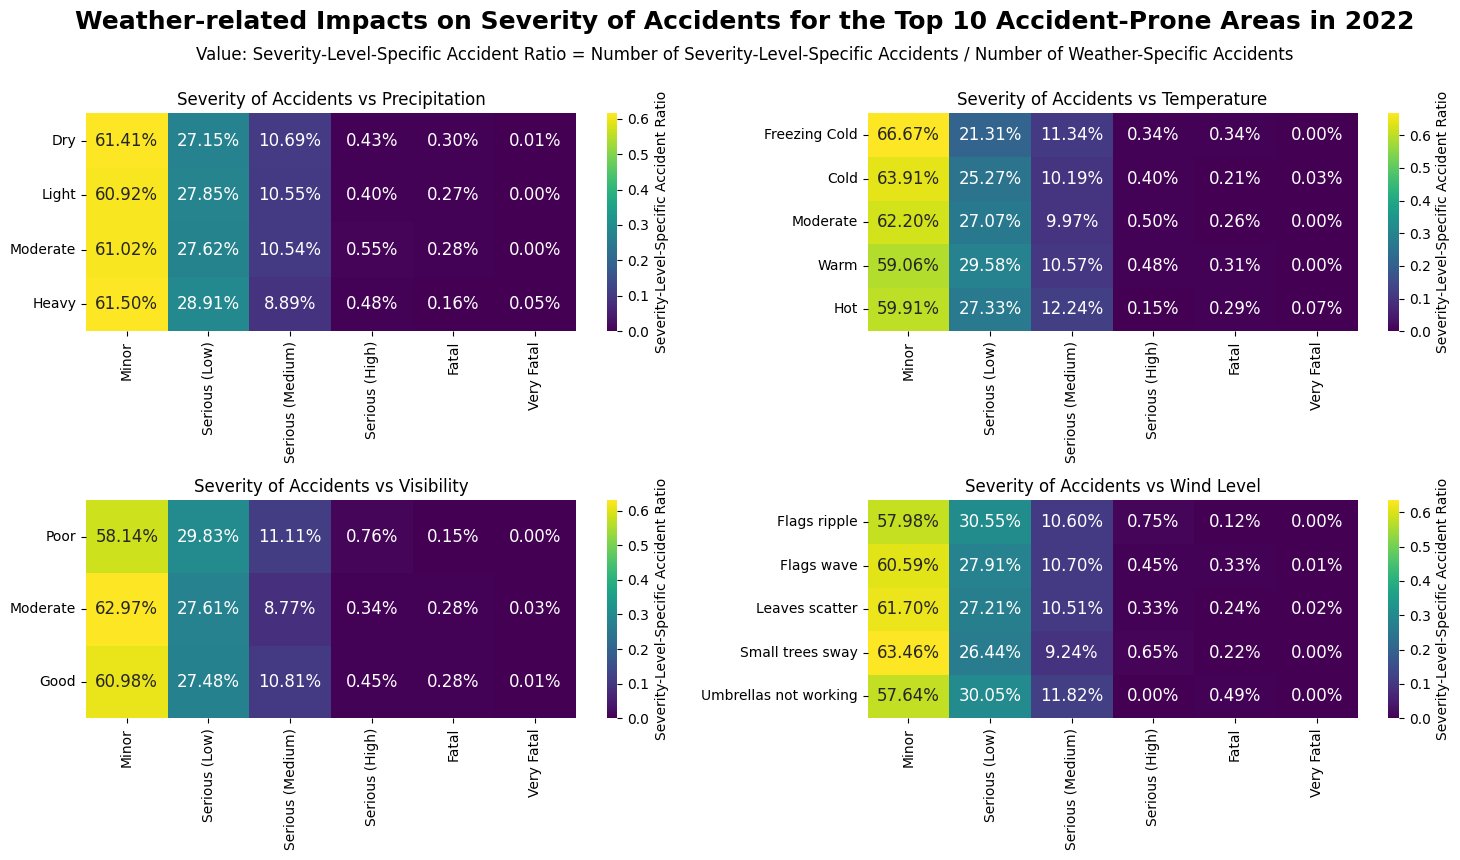

In [17]:
# Set up the plot for other weater details
# Set up the grid layout
fig, axes = plt.subplots(2, 2, figsize=(15, 9))
fig.suptitle('Weather-related Impacts on Severity of Accidents for the Top 10 Accident-Prone Areas in 2022', fontsize=18, fontweight = "bold")
fig.text(0.5, 0.93, 'Value: Severity-Level-Specific Accident Ratio = Number of Severity-Level-Specific Accidents / Number of Weather-Specific Accidents',
         ha='center', va='center', fontsize=12)

sns.heatmap(heatmap_data_precip, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity-Level-Specific Accident Ratio'},
            annot_kws={"size": 12}, ax = axes[0,0])
axes[0, 0].set_title('Severity of Accidents vs Precipitation')
axes[0, 0].tick_params(axis='y', rotation=360)  

sns.heatmap(heatmap_data_temp, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity-Level-Specific Accident Ratio'}, 
            annot_kws={"size": 12},ax = axes[0,1])
axes[0, 1].set_title('Severity of Accidents vs Temperature')
axes[0, 1].tick_params(axis='y', rotation=360)  

sns.heatmap(heatmap_data_vis, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity-Level-Specific Accident Ratio'}, 
            annot_kws={"size": 12}, ax = axes[1,0])

axes[1, 0].set_title('Severity of Accidents vs Visibility')
axes[1, 0].tick_params(axis='y', rotation=360)  

sns.heatmap(heatmap_data_wind, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity-Level-Specific Accident Ratio'}, 
            annot_kws={"size": 12}, ax = axes[1,1])
axes[1, 1].set_title('Severity of Accidents vs Wind Level')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('../static/images/severity_moreweather_top10.png', dpi=300, bbox_inches='tight')
plt.show()


We can discern subtle distinctions among categories. For example, the occurrence of very fatal cases seems to be higher on days with heavy precipitation and higher temperatures compared to days with no rain and milder temperatures. Additionally, within the visibility category, there is a lower frequency of minor cases on days with poor visibility compared to those with clearer visibility. However, we are unable to pinpoint significant differences across categories, and therefore, there are no clear clues regarding the degree of impact weather has on the severity of traffic accidents.

Create plots that show the impact of weather on the overall counts of accidents 

In [18]:
# create a collision_count_df that counts the total number of accidents by date
# merge the weather info to the collision_count_df
collision_count_df = pd.DataFrame()
collision_count_df["count"] = allzipcodes_weather_df.groupby('date').size()
collision_count_df.reset_index(inplace = True)

In [19]:
collision_count_df.columns

Index(['date', 'count'], dtype='object')

In [20]:
weather_df = pd.read_csv('../Resources/weather_classified_df.csv')
weather_df.rename(columns={"datetime":"date"},inplace = True)
columns_to_keep = ['date','icon', 'temperature_category', 'precip_category','humid_category', 'wind_level', 'vis_level']
weather_df = weather_df[columns_to_keep]

In [21]:
weather_df

,date,icon,temperature_category,precip_category,humid_category,wind_level,vis_level
0,2022-01-01,rain,Moderate,Heavy,Very High,Flags wave,Poor
1,2022-01-02,rain,Moderate,Light,Very High,Leaves scatter,Moderate
2,2022-01-03,cloudy,Cold,Dry,Low,Leaves scatter,Good
3,2022-01-04,clear-day,Cold,Dry,Low,Leaves scatter,Good
4,2022-01-05,rain,Cold,Moderate,High,Leaves scatter,Moderate
...,...,...,...,...,...,...,...
360,2022-12-27,cloudy,Cold,Dry,Low,Flags wave,Good
361,2022-12-28,cloudy,Moderate,Dry,Low,Flags wave,Good
362,2022-12-29,clear-day,Moderate,Dry,Low,Flags wave,Good
363,2022-12-30,cloudy,Moderate,Dry,Low,Flags ripple,Good


In [22]:
merged_df = pd.merge(collision_count_df, weather_df, on='date')

In [23]:
merged_df.columns

Index(['date', 'count', 'icon', 'temperature_category', 'precip_category',
       'humid_category', 'wind_level', 'vis_level'],
      dtype='object')

/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_7989/1954818847.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[0], x='icon', y='count', order = icon_order, data=merged_df, palette='Set2')
/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_7989/1954818847.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = axes[1], x='icon', data=merged_df, order=icon_order, palette='Set2')


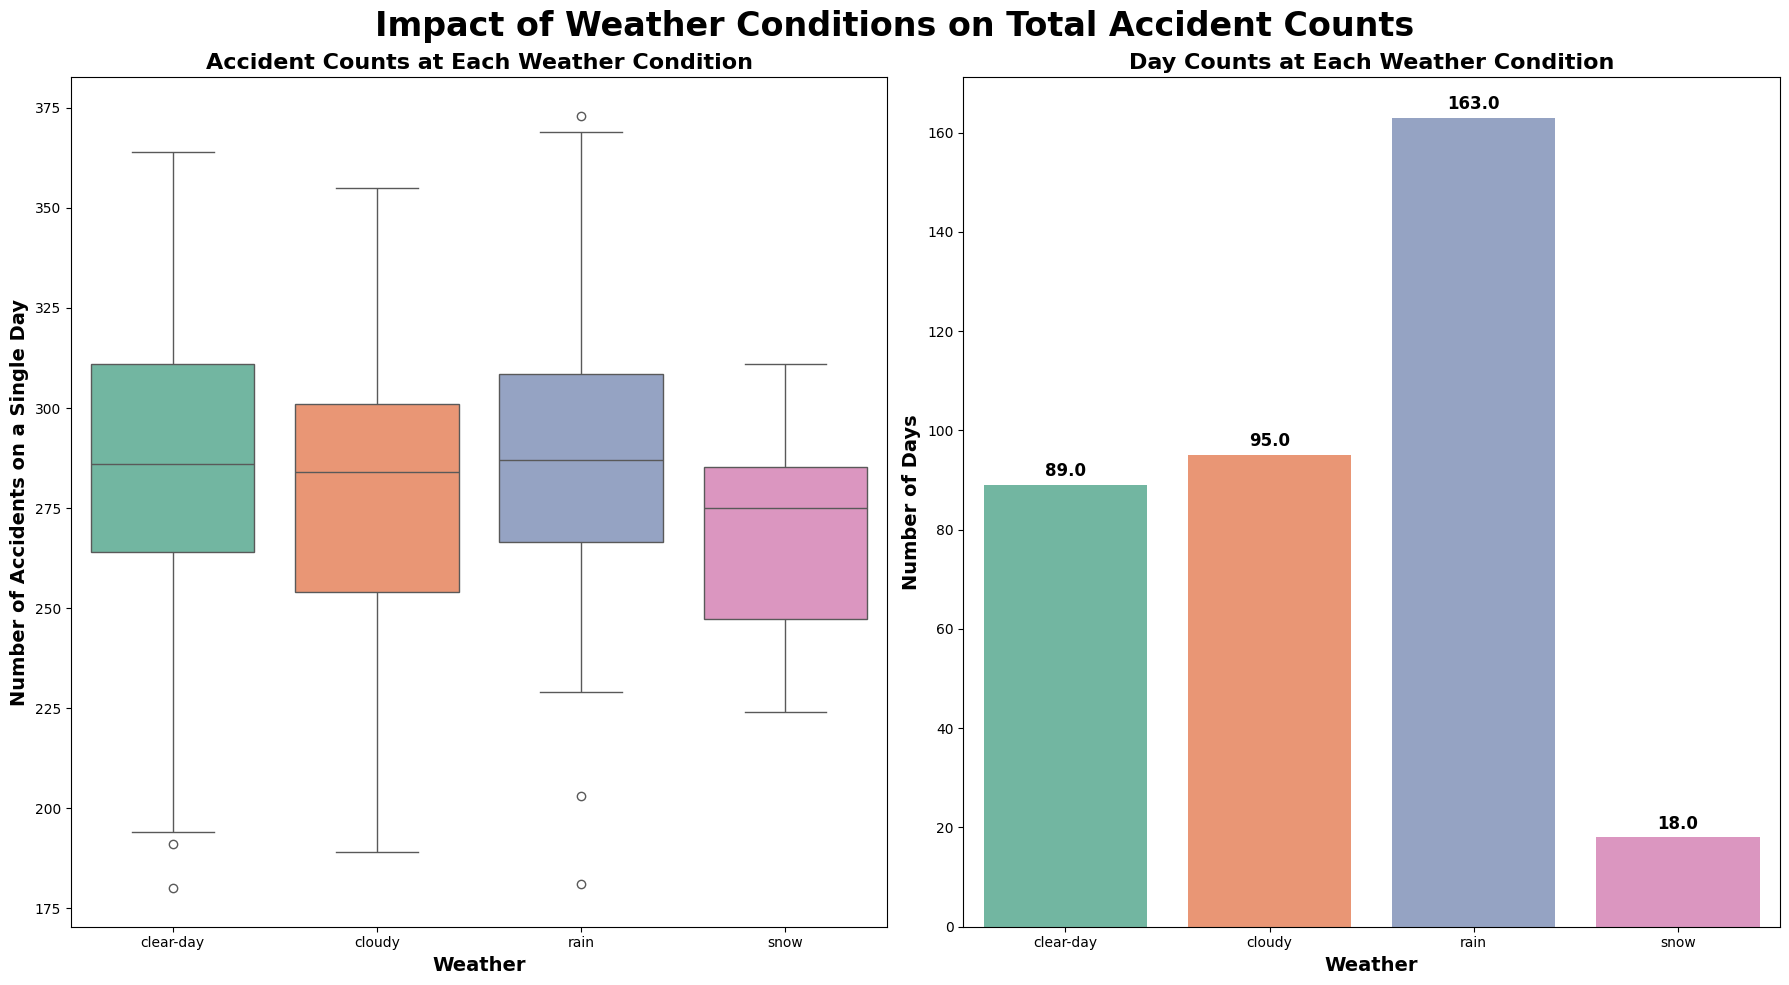

In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

icon_order = ["clear-day","cloudy","rain","snow"]

# Set the size of the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Impact of Weather Conditions on Total Accident Counts', fontsize=24,fontweight= "bold")

# Create a boxplot for the first subplot
sns.boxplot(ax = axes[0], x='icon', y='count', order = icon_order, data=merged_df, palette='Set2')

# Set plot labels and title
axes[0].set_xlabel('Weather',fontsize=14,fontweight= "bold")
axes[0].set_ylabel('Number of Accidents on a Single Day',fontsize=14,fontweight= "bold")
axes[0].set_title('Accident Counts at Each Weather Condition',fontsize=16,fontweight= "bold")
axes[0].tick_params(axis='x') 


# Create a countplot for the second subplot showing the counts of each wind level
sns.countplot(ax = axes[1], x='icon', data=merged_df, order=icon_order, palette='Set2')
axes[1].set_title('Day Counts at Each Weather Condition',fontsize=16,fontweight= "bold")
axes[1].set_xlabel('Weather',fontsize=14,fontweight= "bold")
axes[1].set_ylabel('Number of Days',fontsize=14,fontweight= "bold")
axes[1].tick_params(axis='x') 
# Adding text annotations next to each bar
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize = 12, fontweight = "bold")


plt.tight_layout()
plt.savefig('../static/images/weather_totalcount.png', dpi=300, bbox_inches='tight')
plt.show()

The boxplots illustrate the distribution of accident numbers under different weather conditions. Rain and cloudy weather show a wide range of accident counts, with rain exhibiting some outliers, indicating occasional spikes in accident numbers during such weather. Clear days have a relatively compact distribution but with a slight skew towards higher accident counts. Snowy conditions, while having fewer accidents overall, display a tight distribution with fewer outliers, suggesting a more consistent accident rate during such conditions. Overall, the variability in accident counts is greatest during rainy and cloudy weather, which could be due to the impact of these conditions on visibility and road surface conditions, affecting driving safety.

/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_7989/799004775.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[0], x='wind_level', y='count', order = wind_order, data=merged_df, palette='Set2')
/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_7989/799004775.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = axes[1], x='wind_level', data=merged_df, order=wind_order, palette='Set2')


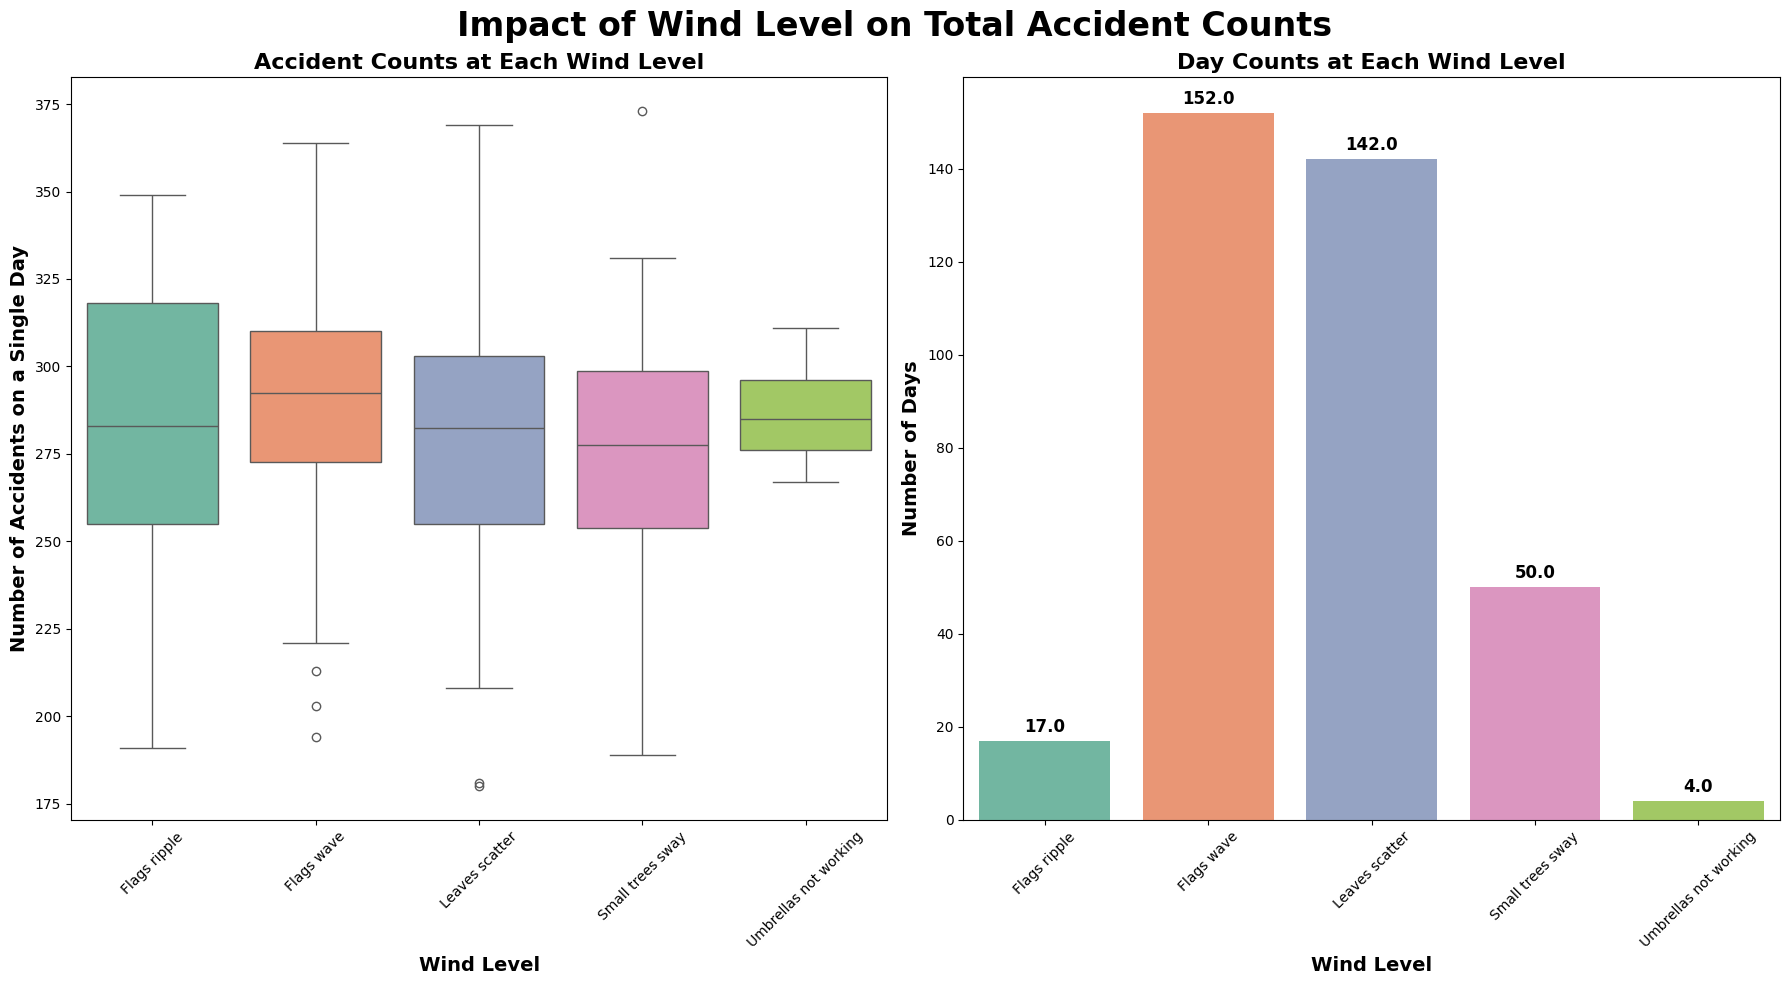

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

wind_order = ['Flags ripple', 'Flags wave', 'Leaves scatter', 'Small trees sway', 'Umbrellas not working']

# Set the size of the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Impact of Wind Level on Total Accident Counts', fontsize=24,fontweight= "bold")

# Create a boxplot for the first subplot
sns.boxplot(ax = axes[0], x='wind_level', y='count', order = wind_order, data=merged_df, palette='Set2')

# Set plot labels and title
axes[0].set_xlabel('Wind Level',fontsize=14,fontweight= "bold")
axes[0].set_ylabel('Number of Accidents on a Single Day',fontsize=14,fontweight= "bold")
axes[0].set_title('Accident Counts at Each Wind Level',fontsize=16,fontweight= "bold")
axes[0].tick_params(axis='x', rotation=45) 


# Create a countplot for the second subplot showing the counts of each wind level
sns.countplot(ax = axes[1], x='wind_level', data=merged_df, order=wind_order, palette='Set2')
axes[1].set_title('Day Counts at Each Wind Level',fontsize=16,fontweight= "bold")
axes[1].set_xlabel('Wind Level',fontsize=14,fontweight= "bold")
axes[1].set_ylabel('Number of Days',fontsize=14,fontweight= "bold")
axes[1].tick_params(axis='x', rotation=45) 
# Adding text annotations next to each bar
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize = 12, fontweight = "bold")


plt.tight_layout()

plt.savefig('../static/images/wind_totalcounts.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_7989/663760182.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[0], x='temperature_category', y='count', order = temp_order, data=merged_df, palette='Set2')
/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_7989/663760182.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = axes[1], x='temperature_category', data=merged_df, order=temp_order, palette='Set2')


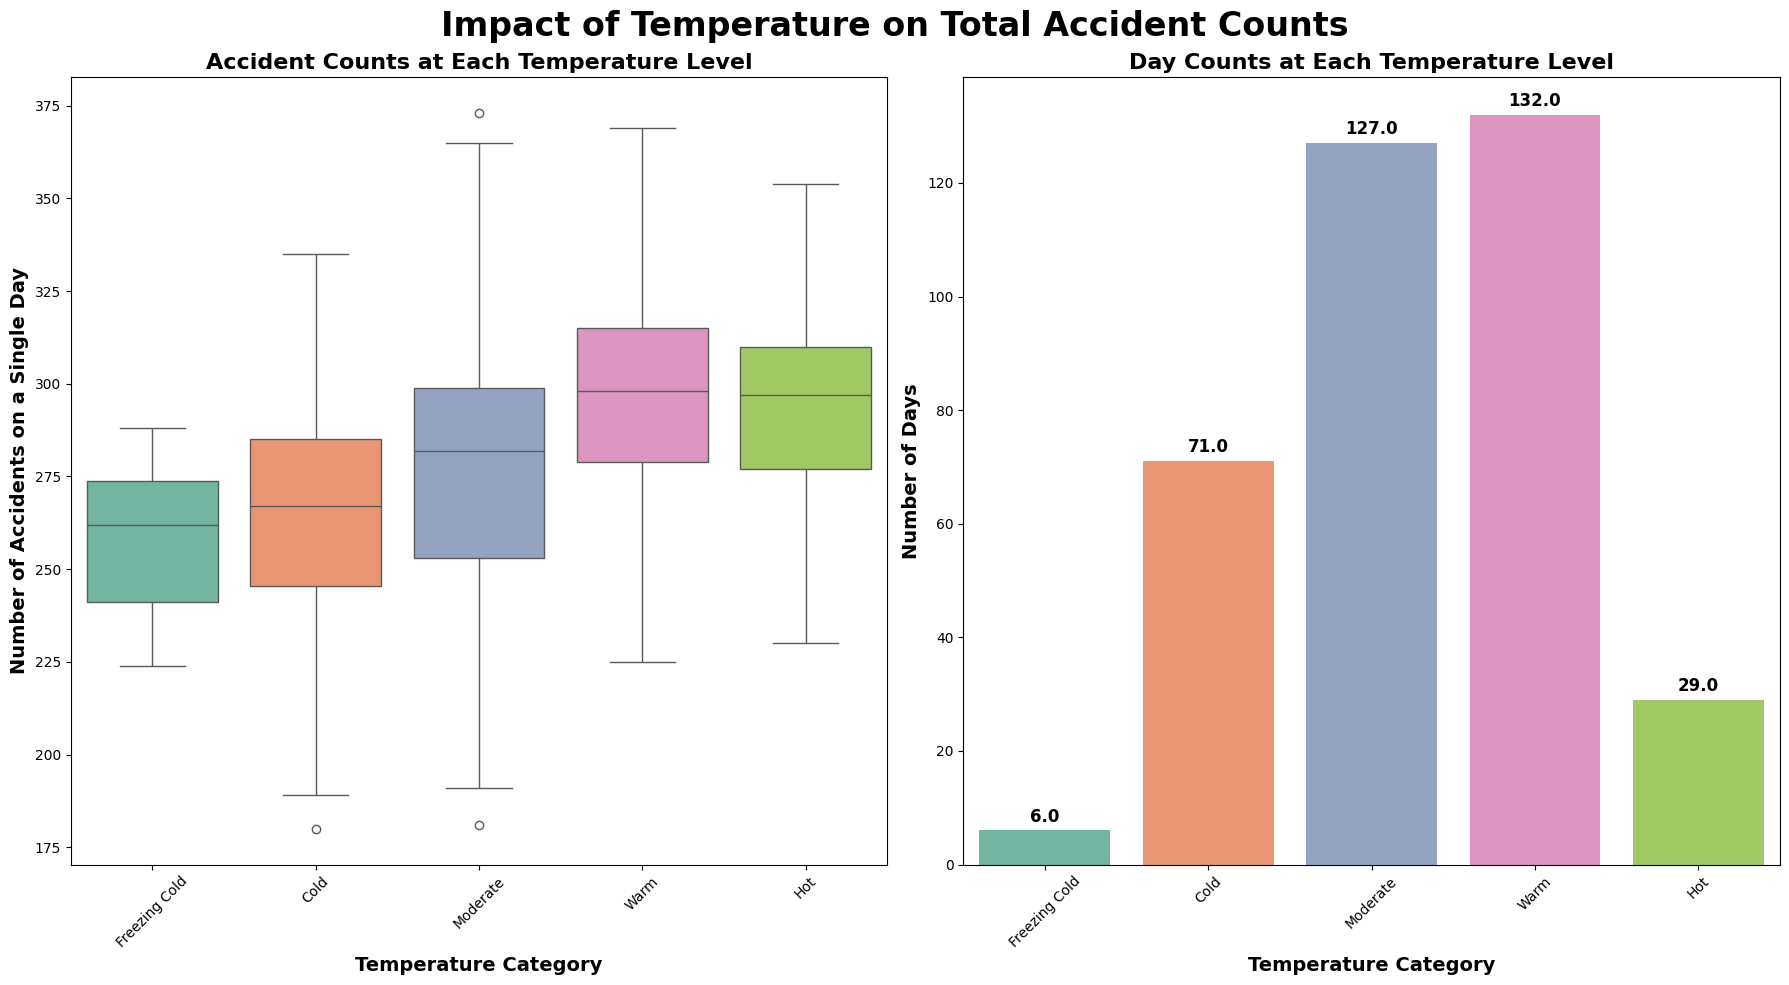

In [26]:

import seaborn as sns
import matplotlib.pyplot as plt

temp_order = ['Freezing Cold', 'Cold', 'Moderate', 'Warm', 'Hot']

# Set the size of the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Impact of Temperature on Total Accident Counts', fontsize=24,fontweight= "bold")

# Create a boxplot
sns.boxplot(ax = axes[0], x='temperature_category', y='count', order = temp_order, data=merged_df, palette='Set2')

# Set plot labels and title
axes[0].set_xlabel('Temperature Category',fontsize=14,fontweight= "bold")
axes[0].set_ylabel('Number of Accidents on a Single Day',fontsize=14,fontweight= "bold")
axes[0].set_title('Accident Counts at Each Temperature Level',fontsize=16,fontweight= "bold")
axes[0].tick_params(axis='x', rotation=45) 

# Create a countplot for the second subplot showing the counts of each wind level
sns.countplot(ax = axes[1], x='temperature_category', data=merged_df, order=temp_order, palette='Set2')
axes[1].set_title('Day Counts at Each Temperature Level',fontsize=16,fontweight= "bold")
axes[1].set_xlabel('Temperature Category',fontsize=14,fontweight= "bold")
axes[1].set_ylabel('Number of Days',fontsize=14,fontweight= "bold")
axes[1].tick_params(axis='x', rotation=45) 
# Adding text annotations next to each bar
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize = 12, fontweight = "bold")


plt.tight_layout()

plt.savefig('../static/images/temp_totalcounts.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_7989/3036988693.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[0], x='precip_category', y='count', order = precip_order, data=merged_df, palette='Set2')
/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_7989/3036988693.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = axes[1], x='precip_category', data=merged_df, order=precip_order, palette='Set2')


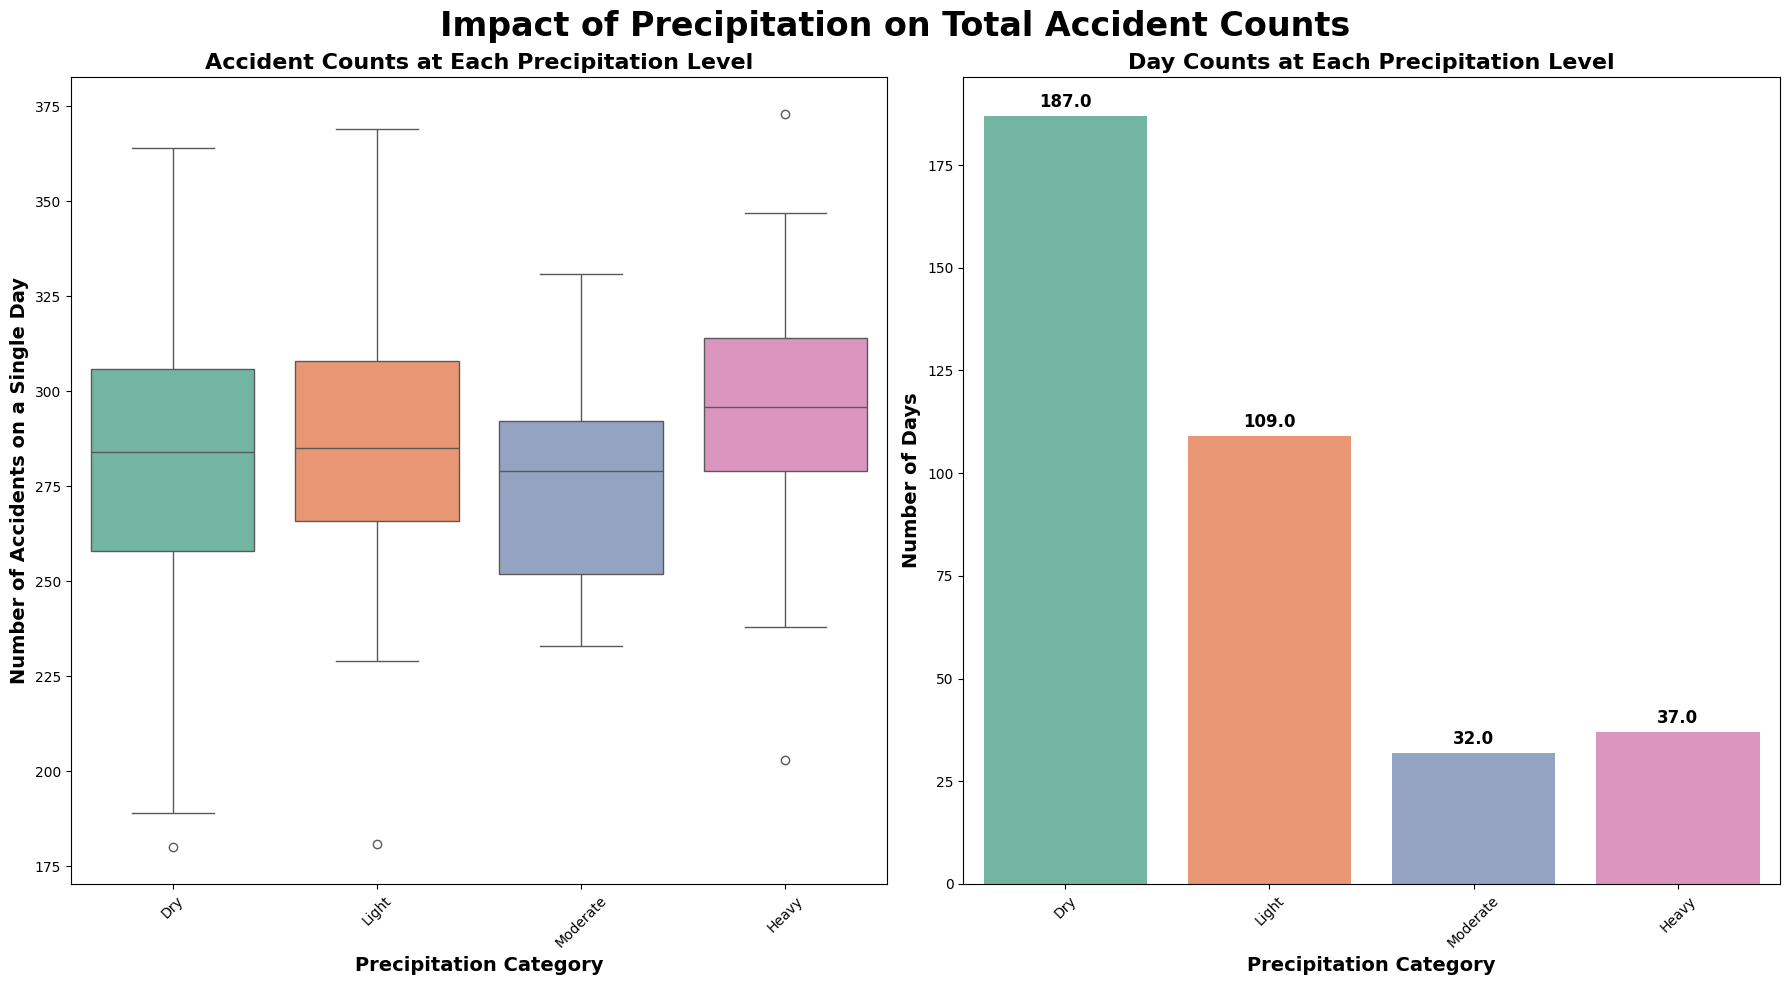

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

precip_order = ["Dry","Light","Moderate","Heavy"]

# Set the size of the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Impact of Precipitation on Total Accident Counts', fontsize=24,fontweight= "bold")

# Create a boxplot
sns.boxplot(ax = axes[0], x='precip_category', y='count', order = precip_order, data=merged_df, palette='Set2')

# Set plot labels and title
axes[0].set_xlabel('Precipitation Category',fontsize=14,fontweight= "bold")
axes[0].set_ylabel('Number of Accidents on a Single Day',fontsize=14,fontweight= "bold")
axes[0].set_title('Accident Counts at Each Precipitation Level',fontsize=16,fontweight= "bold")
axes[0].tick_params(axis='x', rotation=45) 

# Create a countplot for the second subplot showing the counts of each wind level
sns.countplot(ax = axes[1], x='precip_category', data=merged_df, order=precip_order, palette='Set2')
axes[1].set_title('Day Counts at Each Precipitation Level',fontsize=16,fontweight= "bold")
axes[1].set_xlabel('Precipitation Category',fontsize=14,fontweight= "bold")
axes[1].set_ylabel('Number of Days',fontsize=14,fontweight= "bold")
axes[1].tick_params(axis='x', rotation=45) 
# Adding text annotations next to each bar
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize = 12, fontweight = "bold")


plt.tight_layout()
plt.savefig('../static/images/precip_totalcount.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_7989/2041822893.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[0], x='vis_level', y='count', order = vis_order, data=merged_df, palette='Set2')
/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_7989/2041822893.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = axes[1], x='vis_level', data=merged_df, order=vis_order, palette='Set2')


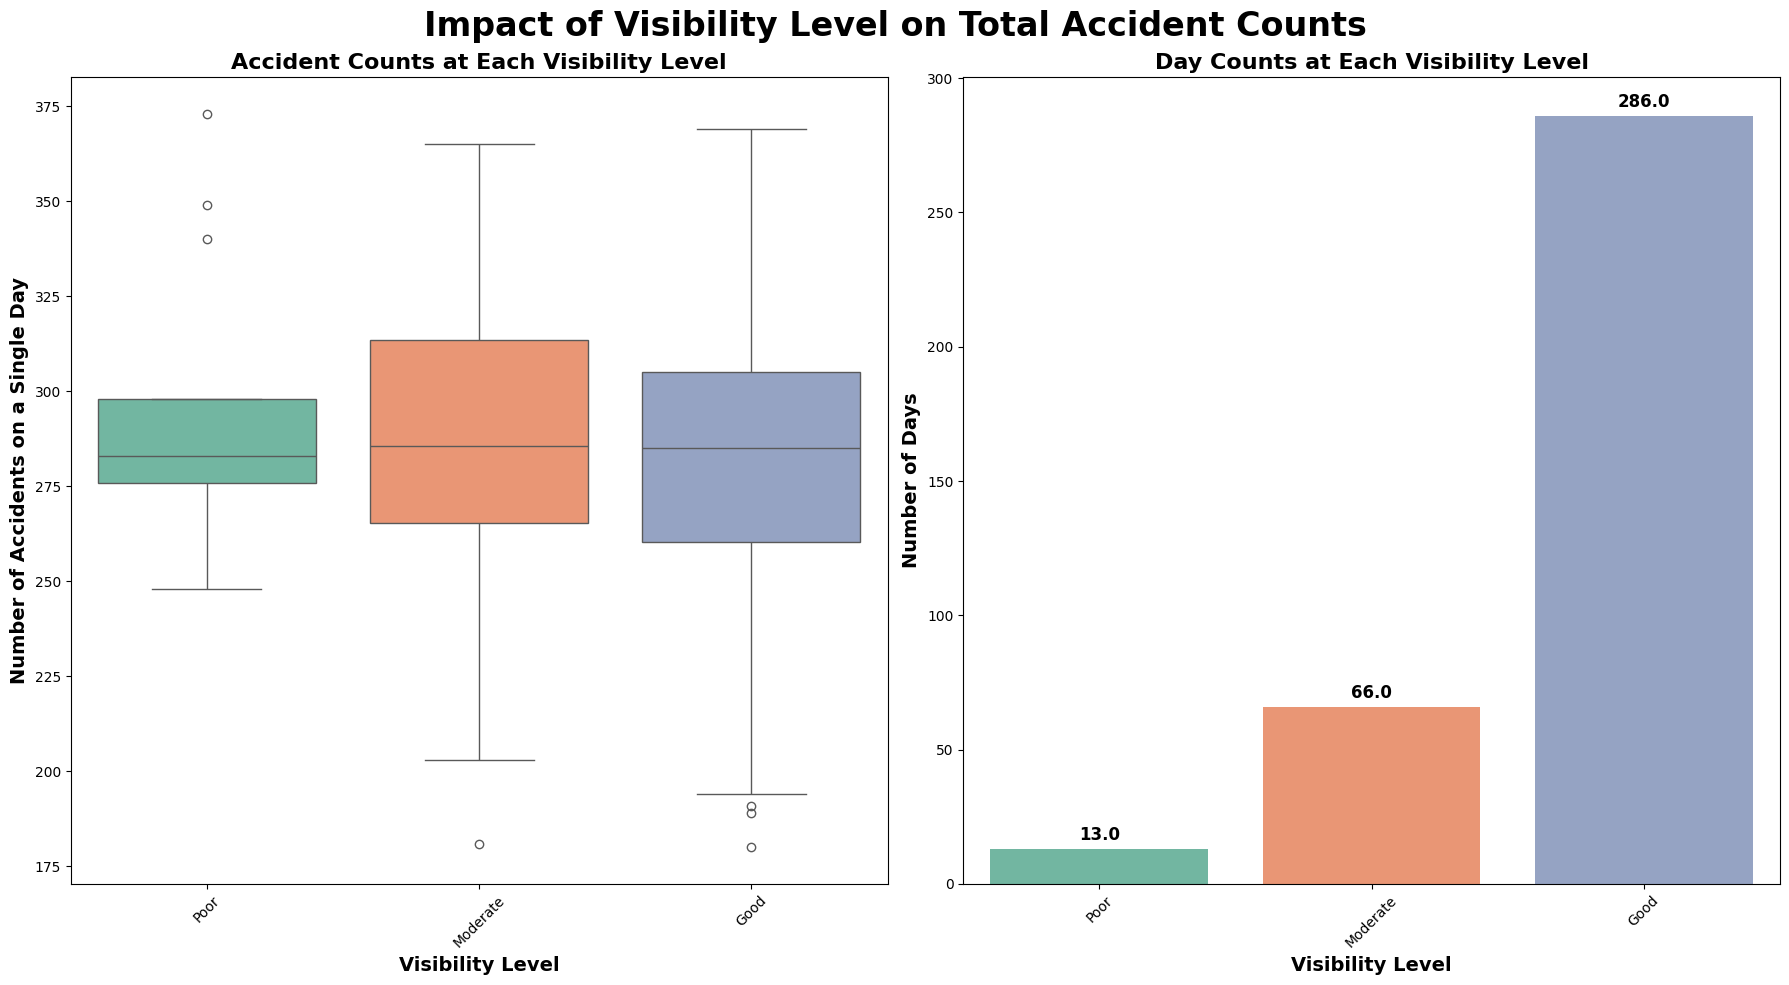

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

vis_order = ["Poor","Moderate","Good"]

# Set the size of the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Impact of Visibility Level on Total Accident Counts', fontsize=24,fontweight= "bold")

# Create a boxplot
sns.boxplot(ax = axes[0], x='vis_level', y='count', order = vis_order, data=merged_df, palette='Set2')

# Set plot labels and title
axes[0].set_xlabel('Visibility Level',fontsize=14,fontweight= "bold")
axes[0].set_ylabel('Number of Accidents on a Single Day',fontsize=14,fontweight= "bold")
axes[0].set_title('Accident Counts at Each Visibility Level',fontsize=16,fontweight= "bold")
axes[0].tick_params(axis='x', rotation=45) 

# Create a countplot for the second subplot showing the counts of each wind level
sns.countplot(ax = axes[1], x='vis_level', data=merged_df, order=vis_order, palette='Set2')
axes[1].set_title('Day Counts at Each Visibility Level',fontsize=16,fontweight= "bold")
axes[1].set_xlabel('Visibility Level',fontsize=14,fontweight= "bold")
axes[1].set_ylabel('Number of Days',fontsize=14,fontweight= "bold")
axes[1].tick_params(axis='x', rotation=45) 
# Adding text annotations next to each bar
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize = 12, fontweight = "bold")


plt.tight_layout()
plt.savefig('../static/images/vis_totalcount.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

The boxplots visualize the distribution of crashes across different temperature levels. Moderate temperatures seem to have a higher median number of crashes compared to other categories, with a notable spread of data points indicating variability in crash frequency. Cold temperatures show a similar range of crash numbers, with outliers suggesting occasional spikes in crashes during colder weather. Freezing temperatures have the smallest interquartile range, indicating more consistent crash numbers, while warm and hot temperatures show a wider spread, with warm temperatures having a slightly higher median number of crashes. This information could suggest that driver behavior or road conditions at moderate to warm temperatures might contribute to higher crash frequencies.

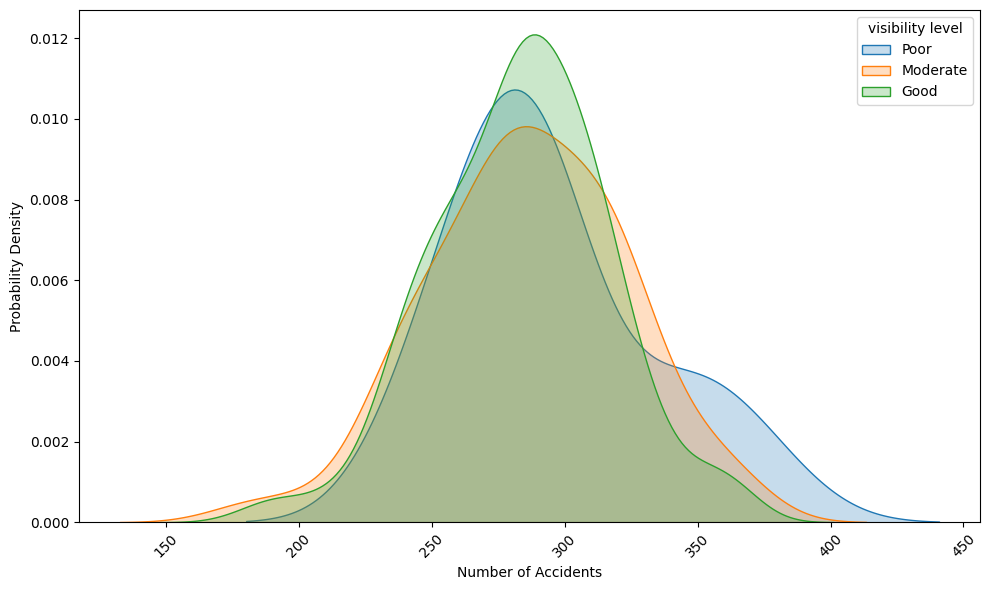

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distribution using a kernel density estimate (KDE) for each wind level
plt.figure(figsize=(10, 6))

sns.kdeplot(merged_df.loc[(merged_df['vis_level']=='Poor'),
            'count'], fill=True, label='Poor')
 
sns.kdeplot(merged_df.loc[(merged_df['vis_level']=='Moderate'), 
            'count'], fill=True, label='Moderate')

sns.kdeplot(merged_df.loc[(merged_df['vis_level']=='Good'), 
            'count'], fill=True, label='Good')


# Set plot labels and title
plt.xlabel('Number of Accidents')
plt.ylabel('Probability Density')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend(title='visibility level', loc='upper right')

plt.tight_layout()
plt.savefig('../static/images/accident_distribution_by_vis_level.png', dpi=300)

# Show the plot
plt.show()

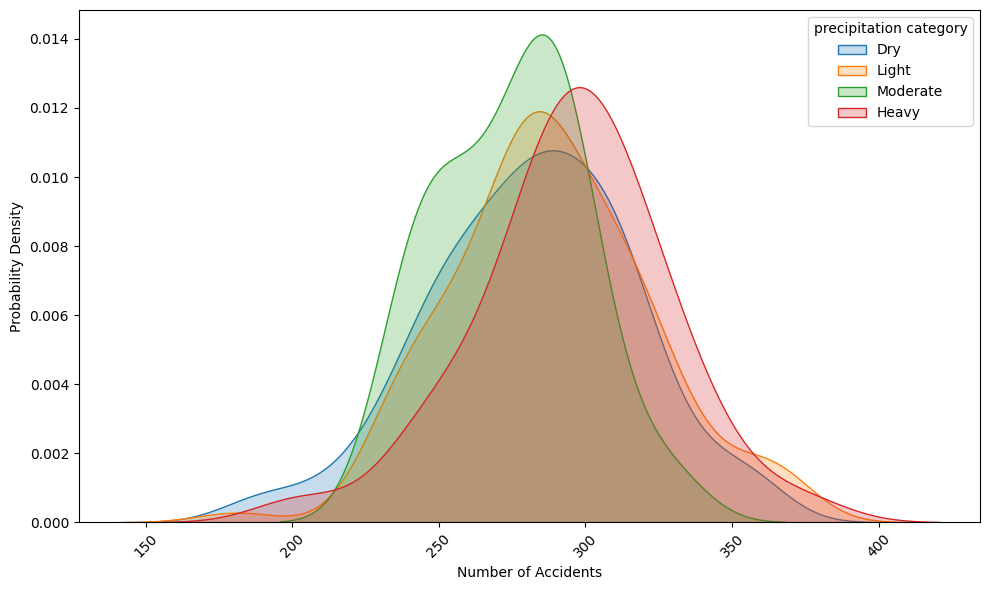

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distribution using a kernel density estimate (KDE) for each wind level
plt.figure(figsize=(10, 6))

sns.kdeplot(merged_df.loc[(merged_df['precip_category']=='Dry'),
            'count'], fill=True, label='Dry')
 
sns.kdeplot(merged_df.loc[(merged_df['precip_category']=='Light'), 
            'count'], fill=True, label='Light')

sns.kdeplot(merged_df.loc[(merged_df['precip_category']=='Moderate'), 
            'count'], fill=True, label='Moderate')

sns.kdeplot(merged_df.loc[(merged_df['precip_category']=='Heavy'), 
            'count'], fill=True, label='Heavy')
 
# Set plot labels and title
plt.xlabel('Number of Accidents')
plt.ylabel('Probability Density')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend(title='precipitation category', loc='upper right')

plt.tight_layout()
plt.savefig('../static/images/accident_distribution_by_precip_level.png', dpi=300)

# Show the plot
plt.show()


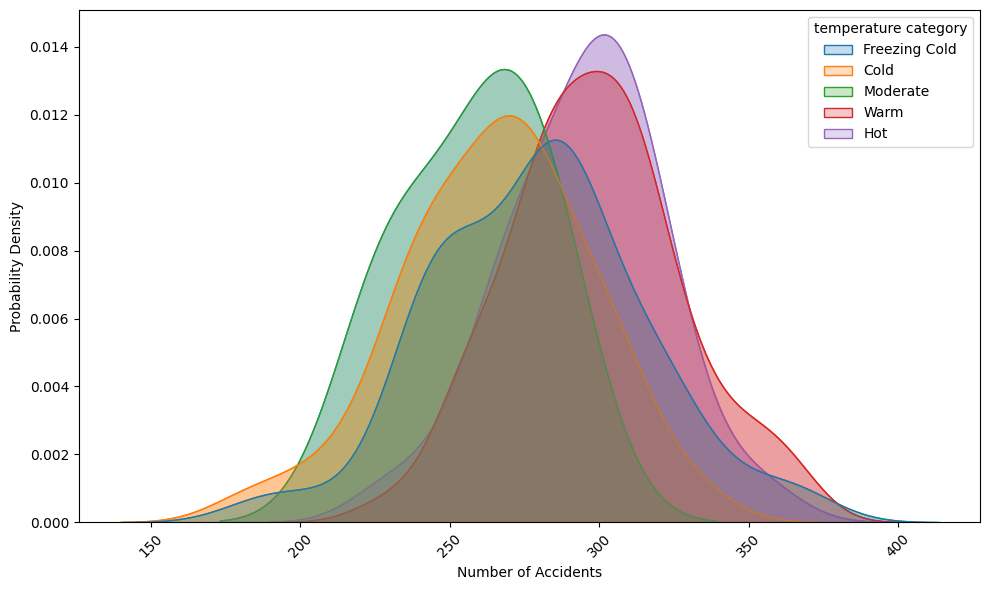

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = merged_df[["temperature_category","count"]]

# Plot the distribution using a kernel density estimate (KDE) for each wind level
plt.figure(figsize=(10, 6))

sns.kdeplot(filtered_df.loc[(filtered_df['temperature_category']=='Freezing Cold'),
            'count'], fill=True, label='Freezing Cold')
 
sns.kdeplot(filtered_df.loc[(filtered_df['temperature_category']=='Cold'), 
            'count'], fill=True, label='Cold')

sns.kdeplot(filtered_df.loc[(filtered_df['temperature_category']=='Moderate'), 
            'count'], fill=True, label='Moderate')

sns.kdeplot(filtered_df.loc[(filtered_df['temperature_category']=='Warm'), 
            'count'], fill=True, label='Warm')

sns.kdeplot(filtered_df.loc[(filtered_df['temperature_category']=='Hot'), 
            'count'], fill=True, label='Hot')

ax = sns.kdeplot(data=merged_df, x='count', hue='temperature_category', common_norm=False, fill=True)

# Set plot labels and title
plt.xlabel('Number of Accidents')
plt.ylabel('Probability Density')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend(title='temperature category', loc='upper right')


plt.tight_layout()
plt.savefig('../static/images/accident_distribution_by_temp_category.png', dpi=300)

# Show the plot
plt.show()



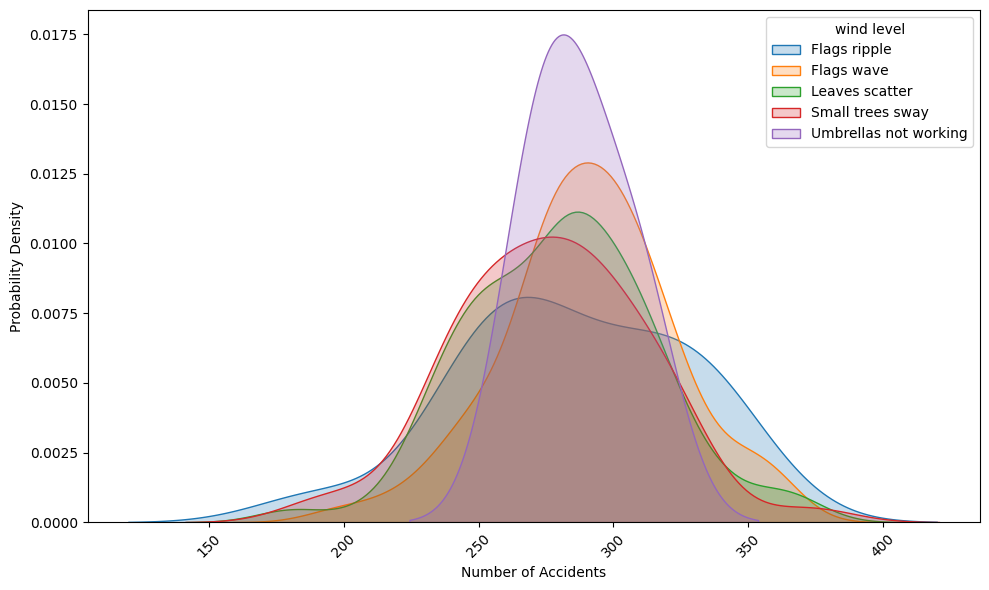

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = merged_df[["wind_level","count"]]

# Plot the distribution using a kernel density estimate (KDE) for each wind level
plt.figure(figsize=(10, 6))

sns.kdeplot(filtered_df.loc[(filtered_df['wind_level']=='Flags ripple'),
            'count'], fill=True, label='Flags ripple')
 
sns.kdeplot(filtered_df.loc[(filtered_df['wind_level']=='Flags wave'), 
            'count'], fill=True, label='Flags wave')

sns.kdeplot(filtered_df.loc[(filtered_df['wind_level']=='Leaves scatter'), 
            'count'], fill=True, label='Leaves scatter')

sns.kdeplot(filtered_df.loc[(filtered_df['wind_level']=='Small trees sway'), 
            'count'], fill=True, label='Small trees sway')

sns.kdeplot(filtered_df.loc[(filtered_df['wind_level']=='Umbrellas not working'), 
            'count'], fill=True, label='Umbrellas not working')

# Set plot labels and title
plt.xlabel('Number of Accidents')
plt.ylabel('Probability Density')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend(title='wind level', loc='upper right')

plt.tight_layout()
plt.savefig('../static/images/accident_distribution_by_wind_level.png', dpi=300)

# Show the plot
plt.show()

The graph depicts the probability distribution of accidents for different wind levels throughout 2022. Each bell-shaped curve represents the likelihood of accident counts at varying wind intensities. The overlapping nature of the distributions suggests that there is no clear, singular effect of wind on the probability of accidents, as the ranges of accident numbers for different wind levels are quite similar. The peak of each distribution indicates the most probable number of accidents at a particular wind level, and the width of the curves reflects the variability of accidents associated with that wind level. No single wind level stands out as having a significantly different impact on the number of accidents.